# **Loading Important Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# **Loading the Dataset**

In [ ]:
data = pd.read_csv("/content/advertising.csv")
print(data.info())
print(data.head())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# **Data Normalization**

In [ ]:
scaler = StandardScaler()
numeric_features = ["TV", "Newspaper", "Radio"]
data_norm = data.copy()
data_norm[numeric_features] = scaler.fit_transform(data_norm[numeric_features])
data_norm.head()
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# **Correlation**

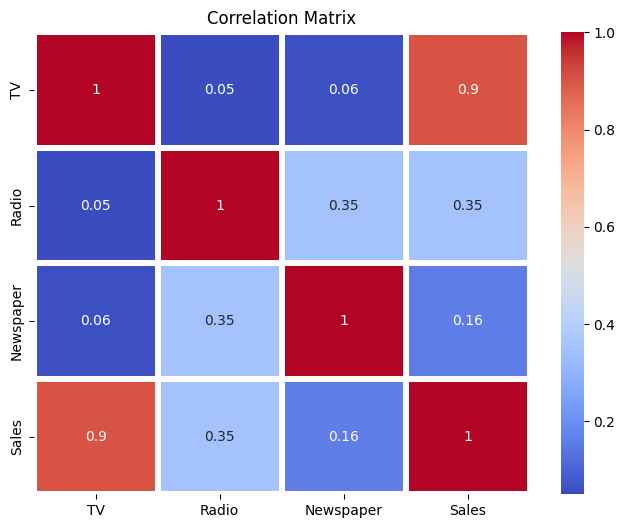

In [ ]:
plt.figure(figsize=(8, 6))
data_cor = round(data_norm.corr(),2)
sns.heatmap(data_cor, annot = True, cmap = "coolwarm", linewidth = 3)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data_norm.describe()

,TV,Radio,Newspaper,Sales
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,1.221245e-16,-4.529710e-16,2.220446e-16,15.130500
std,1.002509e+00,1.002509e+00,1.002509e+00,5.283892
min,-1.708823e+00,-1.570868e+00,-1.392646e+00,1.600000
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01,11.000000
50%,3.161515e-02,-2.457858e-02,-2.211368e-01,16.000000
75%,8.381955e-01,8.954299e-01,6.695788e-01,19.050000
max,1.744029e+00,1.778300e+00,3.841171e+00,27.000000


# **Visualizing significant variables against our output:**

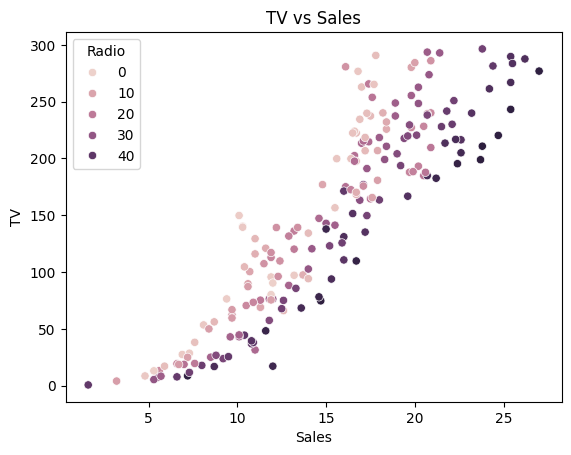

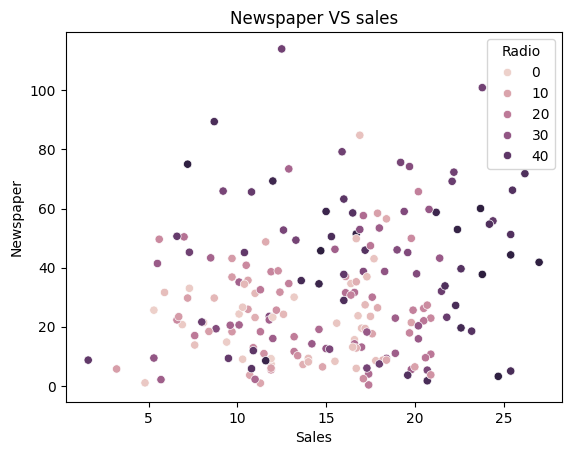

In [ ]:
sns.scatterplot(data = data, x = "Sales", y = "TV", hue = "Radio")
plt.title("TV vs Sales")
plt.show()

sns.scatterplot(data = data, x = "Sales", y = "Newspaper", hue = "Radio")
plt.title("Newspaper VS sales")
plt.show()

# **Pairplot for all variables**

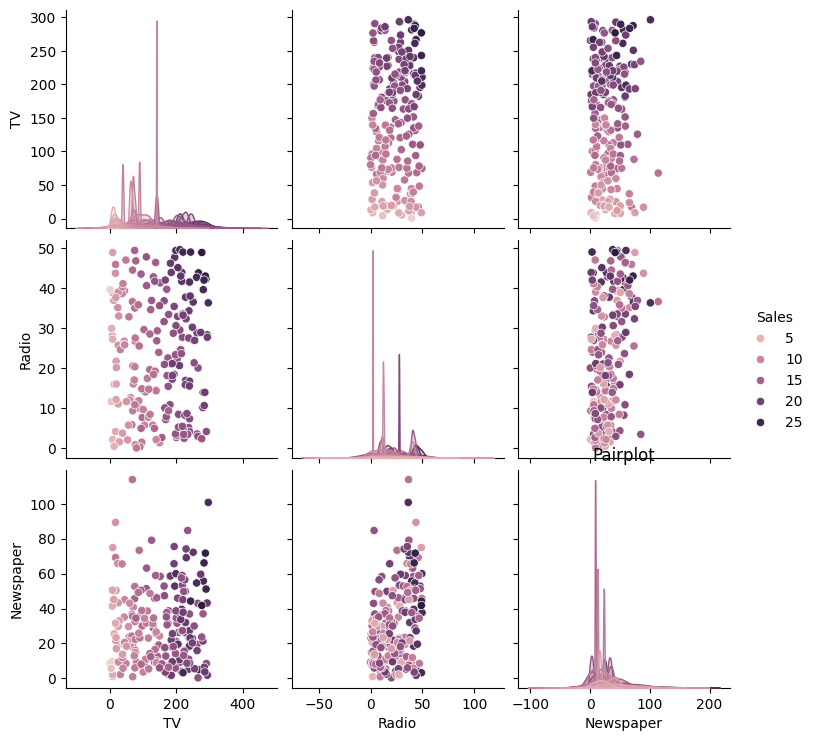

In [ ]:
sns.pairplot(data = data, hue = "Sales")
plt.title("Pairplot")
plt.show()

# **Splitting the data**

In [ ]:
x = data_norm.drop(["Sales"], axis = 1)
y = data_norm["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 9654694)


           TV     Radio  Newspaper
121 -1.497472 -0.105607   0.913547
156 -0.620538  1.366407   0.918151
48   0.935989 -0.503996   0.890531
54   1.350518  0.373810  -0.674550
42   1.711334  0.299535  -1.323599


# **Linear Regression:**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lrpred = lr.predict(x_test)

r2 = r2_score(y_test, lrpred)
mse = mean_squared_error(y_test, lrpred)

print(f"R2: {r2}")
print(f"MSE:{mse}")


R2: 0.8986164415372074
MSE:2.702125291929578


# **Decision Tree Regression**

In [ ]:
decmod = DecisionTreeRegressor()
decmod.fit(x_train,y_train)

decpred = decmod.predict(x_test)

r2 = r2_score(y_test, decpred)
print(f"R2 Score: {r2}")

mse = mean_squared_error(y_test, decpred)
print(f"MSE: {mse}")

R2 Score: 0.8602288715880312
MSE: 3.725249999999998


# **SVR**

In [ ]:
svrmod = SVR()
svrmod.fit(x_train, y_train)

svrpred = svrmod.predict(x_test)

r2 = r2_score(y_test, svrpred)
print(f"R2 Score: {r2}")

mse = mean_squared_error(y_test, svrpred)
print(f"MSE: {mse}")

R2 Score: 0.8313617134520896
MSE: 4.494631932218178
